In [1]:
from sys import path

path +=['..']

from mylib import driwers as dr
import cv2
import ipywidgets
from mylib import Motor
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
%matplotlib notebook

In [3]:
resolution = 1920, 1080

In [4]:
resolution = 4608, 3456

In [4]:
print(dr.motor.list_available_devices())
motM = dr.motor(90113195)
motorM = Motor(motM, 'motor', blocking=True)

[(13, 90113195), (13, 90113196), (13, 90113197)]


In [5]:
cam = cv2.VideoCapture(1)

In [6]:
cam.set(cv2.CAP_PROP_FRAME_WIDTH, resolution[0])
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, resolution[1])
cam.set(cv2.CAP_PROP_EXPOSURE, -5)

True

for a in range(12, 53, 3):
    motM.move_to(a, blocking=True)
    pygame.image.save(cam.get_image(), f'testPic/a{a}.jpg')

<IPython.core.display.Javascript object>


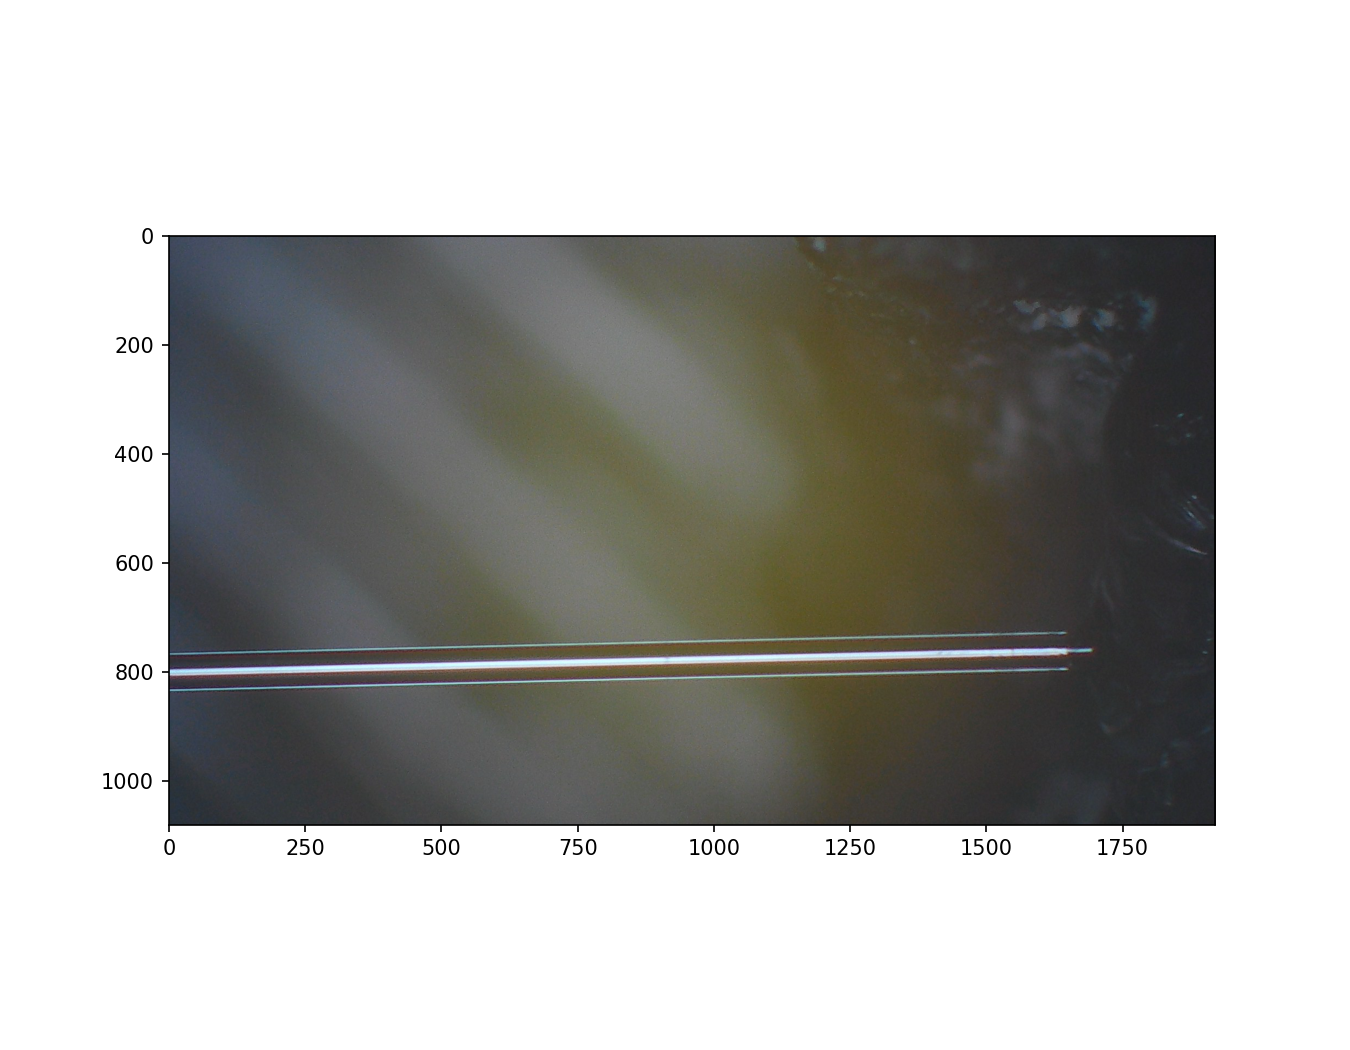

GridspecLayout(children=(GridspecLayout(children=(Button(description='Backwards', layout=Layout(grid_area='wid…

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))
def takeAndShow():
    result, image = cam.read()
    ax.clear()
    ax.imshow(image)
    fig.canvas.draw()
    return image

def moveForw(btn=None, flag=None):
    motorM.Move(.5)
    takeAndShow();
def moveBack(btn=None, flag=None):
    motorM.Move(-.5)
    takeAndShow();
def moveNext(btn=None, flag=None):
    motorM.Move(.5)
    cv2.imwrite(f'testPic/im{motorM.Getposition()}.jpg', takeAndShow())

buttonBack = ipywidgets.widgets.Button(description='Backwards')
buttonForw = ipywidgets.widgets.Button(description='Forwards')
buttonNext = ipywidgets.widgets.Button(description='Next')

buttonBack.on_click(moveBack)
buttonForw.on_click(moveForw)
buttonNext.on_click(moveNext)

grid0 = ipywidgets.GridspecLayout(2, 1)
grid = ipywidgets.GridspecLayout(1, 3)
grid[0, 0] = buttonBack
grid[0, 1] = buttonForw
grid[0, 2] = buttonNext
grid0[0, 0] = grid
display(grid0)

takeAndShow();

In [8]:
startPos = 0
endPos = 39.5

In [9]:
num = 656

In [10]:
os.mkdir(f'testPic/{num}')
os.mkdir(f'testPic/res/{num}')

In [11]:
for i in np.arange(startPos, endPos + .5, .5):
    motorM.MoveTo(i)
    cv2.imwrite(f'testPic/{num}/im{num}_{i}.jpg', takeAndShow())

Перемещение на начальную позицию перед выключением:

In [12]:
motorM.MoveTo(0)

0